<a href="https://colab.research.google.com/github/wonkishtofu/sample_scraper/blob/main/strata_mall_reviews_scanner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Places API - Reviewers Scanner

- This notebook will show you how to query for user reviews from local malls in Singapore, using the Google Places API.
- Run this Notebook in sequence, starting from the top cell down to the bottom.
- Enter your Google API Key in the cell below.

In [ ]:
import getpass
google_api_key = getpass.getpass("Enter your Google API Key Here: ")

Enter your Google API Key Here: ··········


### Install and Import the necessary packages

In [ ]:
!pip install -U pip
!pip install -U googlemaps pandas
import googlemaps
import pandas as pd
import json

In [ ]:
gmaps = googlemaps.Client(key=google_api_key)

# The Adelphi Mall

Firstly, let's demonstrate the use of Google's Places API, by getting user reviews from The Adelphi Mall, a strata mall located right next to Funan
 at Coleman Street.

In [ ]:
# First, we will perform a query for 'The Adelphi' using the googlemaps python client
place_name = 'The Adelphi'
place_details = gmaps.places(place_name, region='SG')
# Next, we will get the Place ID from the first result returned.
place_id = place_details['results'][0]['place_id']
print(place_id)

ChIJ41zoKKcZ2jERaJwPDSfX8zM


In [ ]:
# Obtain the mall's overall Google Rating
place_details['results'][0]['rating']

3.9

In [ ]:
# Now, we will do a location-specific query for the mall, and print the reviews of results:
adelphi = gmaps.place(place_id=place_id, fields=['reviews'], reviews_sort='most_relevant' )
print(json.dumps(adelphi['result']['reviews'], indent=4))

[
    {
        "author_name": "Min Htaw",
        "author_url": "https://www.google.com/maps/contrib/105271491790391338487/reviews",
        "language": "en",
        "original_language": "en",
        "profile_photo_url": "https://lh3.googleusercontent.com/a-/ALV-UjWMSC8sy6GGng1ZEEq41k8gencJmYoDH750GrPTr-GKdPMJ=s128-c0x00000000-cc-rp-mo-ba5",
        "rating": 4,
        "relative_time_description": "4 months ago",
        "text": "Quiet place. Speaker \ud83d\udd08 sound box You can buy, very good quality.",
        "time": 1686986283,
        "translated": false
    },
    {
        "author_name": "Kishore Rochey",
        "author_url": "https://www.google.com/maps/contrib/111628596495174846624/reviews",
        "language": "en",
        "original_language": "en",
        "profile_photo_url": "https://lh3.googleusercontent.com/a-/ALV-UjUCAKwAwUW2gnYaBeTKTAcJ4s_r4O-VbRoSMgXKq_3AdCI=s128-c0x00000000-cc-rp-mo-ba5",
        "rating": 3,
        "relative_time_description": "a year ago",

In [ ]:
# Assuming adelphi is a JSON object obtained using the given code
adelphi_json = adelphi['result']['reviews']

# Convert the JSON data into a Pandas DataFrame
adelphi_df = pd.DataFrame(adelphi_json)
adelphi_df["name"] = place_name
adelphi_df = adelphi_df[['name','rating','text']]
adelphi_df

,name,rating,text
0,The Adelphi,4,"Quiet place. Speaker 🔈 sound box You can buy, ..."
1,The Adelphi,3,It's a place which specialises in high end aud...
2,The Adelphi,4,Look like 90s mall selling camera and audio st...
3,The Adelphi,4,A convenient mall located near to City Hall mr...
4,The Adelphi,5,The place in Singapore for premium hifi gear a...


## Wait - only 5 reviews?!

Unfortunately, google limits the reviews data that can be obtained about places via. their API, per query.

- By setting reviews_sort parameter to 'most_relevant', we are choosing the best five reviews Google believes might be most representative of the overall reviews.
- You may otherwise sort by 'newest', 'highest_rating' and 'lowest_rating' for different results.



- While we might not be able scrape the entirety of Google's Places Reviews data, Five representative reviews might be *useful enough* if we're just looking for a snapshot of what Singaporeans think of Strata Malls, since each mall will be able to yield a total of 5 user reviews.

- A deeper study of individual malls however will require constructing a more bespoke, more fragile and less legal scraper.


### Approach:
We'd be creating a representative dataset of user reviews on strata malls in Singapore by -  

1. Compiling a list of Strata Malls in Singapore, and looping through them.

2. For each mall, we will be querying their place_id.

3. And with their place_id, we will be extracting the corresponding review & rating for each place.

# Strata Mall Reviews Dataset



## **Note to the Team:** Please verify if these are indeed strata malls,


In [ ]:
# First, we create a list of strata malls in Singapore.
strata_malls_in_singapore = [
    "313@Somerset",
    "AMK Hub",
    "Alexandra Retail Centre",
    "Bedok Mall",
    "Bugis Junction",
    "Bugis+",
    "Bukit Panjang Plaza",
    "Capitol Singapore",
    "Changi City Point",
    "Chinatown Point",
    "Clarke Quay Central",
    "Claymore Connect",
    "Clementi Mall",
    "Compass One",
    "Djitsun Mall Bedok",
    "Djitsun Mall",
    "Esplanade Mall",
    "Far East Plaza",
    "Funan",
    "Golden Mile Complex",
    "Great World",
    "HarbourFront Centre",
    "Hillion Mall",
    "ION Orchard",
    "Jewel Changi Airport",
    "Junction 8",
    "Junction 10",
    "Junction Nine",
    "Jurong Point",
    "Kallang Wave Mall",
    "Katong Shopping Centre",
    "Lucky Plaza",
    "Mandarin Gallery",
    "The Shoppes at Marina Bay Sands",
    "Marina Square",
    "Millenia Walk",
    "Ngee Ann City",
    "Northpoint City",
    "Novena Square",
    "One Raffles Place",
    "Orchard Gateway",
    "Orchard Towers",
    "PLQ Mall",
    "Palais Renaissance",
    "Parkway Parade",
    "Paya Lebar Square",
    "Peninsula Plaza",
    "People's Park Centre",
    "Raffles City",
    "Sengkang Grand Mall",
    "Shaw House and Centre",
    "SingPost Centre",
    "South Beach",
    "Square 2",
    "Sun Plaza",
    "Suntec City Mall",
    "Tang Plaza",
    "Tekka Place",
    "The Paragon",
    "The Woodleigh Mall",
    "Tiong Bahru Plaza",
    "United Square",
    "Valley Point",
    "Waterway Point",
    "West Coast Plaza",
    "Westgate",
    "Wheelock Place",
    "Wisma Atria",
    "Wisteria Mall",
    "i12 Katong",
]

In [ ]:
# Create the master_df DataFrame
names = []
overall_ratings = []
ratings = []
texts = []
data = {'name': names, 'overall_rating':overall_ratings , 'rating': ratings, 'text': texts}
mall_df = pd.DataFrame(data)


# Iterate through your list of malls
for mall in strata_malls_in_singapore:
  #For each mall, perform a query first to obtain the current mall's Place ID
  place_details = gmaps.places(mall, region='SG')
  # Next, we will get the Place ID from the first result returned.
  place_id = place_details['results'][0]['place_id']
  # Query again for place details, using the Place ID
  mall_details = gmaps.place(place_id=place_id, reviews_sort='most_relevant' )

  print('------')
  print(mall)
  print('------')
  print(mall_details['result']['reviews'])

  mall_reviews = mall_details['result']['reviews']
  # Save as dataframe
  reviews_df = pd.DataFrame(mall_reviews)
  # Tag the mall name and overall rating to the current mall dataframe
  reviews_df["name"] = mall
  reviews_df["overall_rating"] = place_details['results'][0]['rating']
  # Copy a smaller subset of the columns for a more compact dataframe
  reviews_df = reviews_df[['name','overall_rating','rating','text']]
  # Append the current dataframe to the larger malls dataset.
  mall_df = pd.concat([mall_df, reviews_df], ignore_index=True)

# Rename the 'text' column to 'review' for clarity
mall_df.rename(columns = {'text':'review'}, inplace = True)


In [ ]:
# Save to a CSV
mall_df.to_csv('strata_mall_reviews.csv')

In [ ]:
# ...and download the strata mall reivew list to your local environment
from google.colab import files
files.download("strata_mall_reviews.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# What's next?

With the snapshot sentiments of strata malls in hand, you might want to try some causal analysis of the results by:

Sentiment Analysis
- Creating a wordcloud of the combined sentiments data derived from reviews. (Example shown below)
- How do these sentiments change between the most highest rated reivews, vs. the lowest rated reviews?
- Are there any broad themes you can derive from this sentiment data?
- How do these sentiments change between strata malls and non-strata malls?



In [ ]:
# Install the necessary
!pip install wordcloud matplotlib

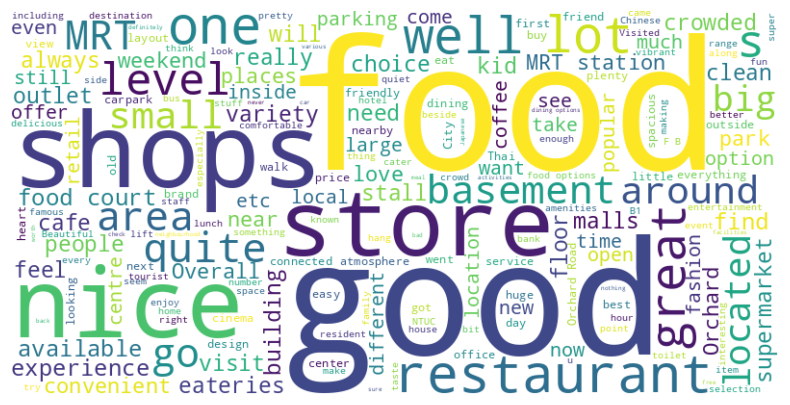

In [ ]:
import pandas as pd
from wordcloud import WordCloud ,STOPWORDS
import matplotlib.pyplot as plt


text_data = ' '.join(mall_df['review'])
custom_stopwords = {'mall', 'shopping', 'shop','place','Singapore','many'}  # Replace with your stop words

wordcloud = WordCloud( width=800,
                      height=400,
                      background_color='white',
                      stopwords=STOPWORDS.union(custom_stopwords)

                      ).generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()